# Observing Dark Worlds

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Ellipse
import math
import edward as ed
import tensorflow as tf
from matplotlib import pyplot as plt

# import data
* all_sky_star = []: skies
    * all_sky_star[i]: one sky
        * all_sky_star[i][0]: galaxy name
        * all_sky_star[i][1]: galaxy x position
        * all_sky_star[i][2]: galaxy y position
        * all_sky_star[i][3]: galaxy E1
        * all_sky_star[i][4]: galaxy E2
* halo = []:halos
    * halo[i] :halo for sky i
        * halo[i][0]: sky name
        * halo[i][1]: number of halos
        * halo[i][2]: halo1 x
        * halo[i][3]: halo1 y
        * ...
        * halo[i][7]: halo3 y

In [2]:
path = "~/probp.finalproject/datasets"
#path = "~/Developer/probp.finalproject.darkMatter/datasets"
all_sky_star = []
for sky in np.arange(1,301,1):
    sky_path = "Train_Skies/Training_Sky"+str(sky)+".csv"
    halo_path = "Training_halos.csv"
    star = (pd.read_csv(path+"/"+sky_path).values)
    all_sky_star.append(star)
halo = (pd.read_csv(path+"/"+halo_path).values)

In [128]:
#plot e1e2
sky=2
plt.clf()
#plt.scatter(all_sky_star[sky][:,3],all_sky_star[sky][:,4])
#print(halo[sky,2],halo[sky,3])
halos = halo[sky,2:4]
plt.show()

e1,e2 = np.array(all_sky_star[sky][:,3:4],dtype=np.float32),np.array(all_sky_star[sky][:,4:5],dtype=np.float32)
sq = np.sqrt(e1**2+e2**2)
q = ((1.+sq)/(1-sq))**2
a1 = np.sqrt(q/(1+q))
b1 = np.sqrt(1./(1+q))
var_e1 = np.var(all_sky_star[sky][:,3])
var_e2 = np.var(all_sky_star[sky][:,4])
print(var_e1)
print(var_e2)
select = a1/b1>2
select = select.reshape(select.shape[0])
pos_xy = all_sky_star[sky][:,1:3]
num = pos_xy.shape[0]
e1_e2 = all_sky_star[sky][:,3:5]
print(num)
pos_all_xy = all_sky_star[0][:,1:3]
pos_all_halo = np.ones(all_sky_star[0][:,1:3].shape)*halo[0,2:4]
pos_all_e1_e2 = all_sky_star[0][:,3:5]
for sky2 in np.arange(1,300,1):
    pos_all_xy = np.concatenate((pos_all_xy,all_sky_star[sky2][:,1:3]),axis = 0)
    pos_all_e1_e2 = np.concatenate((pos_all_e1_e2,all_sky_star[sky2][:,3:5]),axis = 0)
    pos_all_halo = np.concatenate((pos_all_halo,np.ones(all_sky_star[sky2][:,1:3].shape)*halo[sky2,2:4]),axis = 0)
print(pos_all_xy.shape)
print(pos_all_halo.shape)
print(pos_all_e1_e2.shape)
print(halo[sky,2:4])

0.054161954199603214
0.04862034175032515
578
(160842, 2)
(160842, 2)
(160842, 2)
[2315.78 1081.95]


# dist checks

(530,)
(530,)


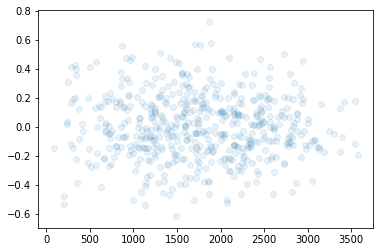

In [35]:
# long/short vs distance
e1,e2 = np.array(all_sky_star[sky][:,3:4],dtype=np.float32),np.array(all_sky_star[sky][:,4:5],dtype=np.float32)
sq = np.sqrt(e1**2+e2**2)
q = ((1.+sq)/(1-sq))**2
a1 = np.sqrt(q/(1+q))
b1 = np.sqrt(1./(1+q))
#print(a1/b1)
gal_x = np.array(all_sky_star[sky][:,1],dtype=np.float32)
gal_y = np.array(all_sky_star[sky][:,2],dtype=np.float32)

l2dist = np.sqrt((gal_x-halo[sky,2])**2+(gal_y-halo[sky,3])**2)
# angle vs angle
#print(l2dist)
plt.scatter(l2dist,e2,alpha=0.1)
print(l2dist.shape)
a_b = (a1/b1).reshape(a1.shape[0])
fun = l2dist*a_b
print(fun.shape)
#plt.hist(fun,100)
plt.show()
#times angle

# Delving into model: A study on L2 diff distrubtion

In [134]:

def calc_phi(glxy_position, halo_position):
    delta = glxy_position - halo_position
    delta = delta.astype(np.float64, copy=False)
    t = np.arctan2(delta[:,1], delta[:,0])
    return t
e = np.array(pos_all_e1_e2, dtype=np.float64)
theta = np.arctan2(e[:,1],e[:,0])/2
phi = calc_phi(pos_all_xy, pos_all_halo)

l2diff = np.sum(np.square(pos_all_xy - pos_all_halo), axis=1) ** 0.5
l2diff = l2diff.reshape((l2diff.shape[0],1))
# z = theta - phi
# z = np.vectorize(lambda x: np.pi + x if x < 0 else x)(z)
# z = z.reshape((z.shape[0],1))

l2_e = np.hstack((l2diff, e))
print(l2_e)
for i in range(0, 5000, 500):
    select = (l2_e[:,0] > i) & (l2_e[:,0] < i+500)
    z = l2_e[select,2]

    #print(z)
    #m = np.pi/2.
    #z = z[z > m]
    #z = np.concatenate((z,2*m-z))
    print('dist = ', i + 250, 'mean = ', z.mean(), 'var = ', z.var())
#plt.clf()
#plt.hist(z, bins='auto')
#plt.show()


[[1094.9011835777692 -0.050569 -0.301238]
 [2468.1732978054843 -0.248973 0.052048000000000004]
 [573.1503652620314 0.483764 0.060890999999999994]
 ..., 
 [917.0093465717786 -0.093425 0.285093]
 [1079.4005270519374 0.116126 -0.132404]
 [3098.5323288615205 0.064384 -0.005815]]
dist =  250 mean =  -0.0012272928334124318 var =  0.08233558506038423
dist =  750 mean =  -0.002309195690510305 var =  0.05345545598100959
dist =  1250 mean =  -0.0015385061791763702 var =  0.04772638613453009
dist =  1750 mean =  0.00018984725309621818 var =  0.046719830676492
dist =  2250 mean =  -0.0017960447117974544 var =  0.04608500911367108
dist =  2750 mean =  -0.0006525608151962294 var =  0.04618209635305365
dist =  3250 mean =  0.00022437825359266294 var =  0.04522617032402575
dist =  3750 mean =  -0.0003067452849117125 var =  0.04612084431575053
dist =  4250 mean =  -0.005333940022740202 var =  0.046143905193299015
dist =  4750 mean =  0.003834269090909084 var =  0.041230865225673055


# Model

In [129]:
import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.distributions as ds

from edward.models import Normal, Uniform, InverseGamma, Empirical

def tangential(glxy_position, halo_position, axis):
    delta = glxy_position - halo_position
    t = 2 * tf.atan2(delta[:,1], delta[:,0])
    return -tf.cos(t) if axis == 0 else -tf.sin(t)

N = num

# Model

X = tf.placeholder(tf.float32, [N, 2])
X_e1 = e1_e2[:,:1].reshape(N).tolist()
X_e2 = e1_e2[:,1:].reshape(N).tolist()

Xh = Uniform(low=[0.,0.],high=[4200., 4200.])
# Xh = Normal(loc=tf.constant([2100., 2100.]), scale=tf.constant(20.0))
# Xh = [2315.61, 1082.86]
m = InverseGamma(1.0, 1.0)

l2diff = tf.sqrt(tf.reduce_sum(tf.square(X - Xh), reduction_indices=1))
sigma = tf.minimum(tf.maximum(tf.constant(.0965) - l2diff * .000058, .045), .082)

sess = ed.get_session()

mu = tf.minimum(tf.maximum(m * 150., 50.), 200.) / tf.maximum(l2diff, 240.)

e1 = Normal(loc = tangential(X, Xh, 0) * mu, scale = sigma)
e2 = Normal(loc = tangential(X, Xh, 1) * mu, scale = sigma)

print(sess.run(sigma, {X:pos_xy}))
# ________ X _________   ___ y ___
# |e1 | e2 | dx | dy |   loc | sig

[ 0.045       0.045       0.045       0.045       0.045       0.045       0.045
  0.045       0.045       0.045       0.045       0.045       0.045       0.045
  0.045       0.045       0.045       0.045       0.045       0.045       0.045
  0.045       0.045       0.045       0.045       0.045       0.045       0.045
  0.045       0.045       0.045       0.045       0.045       0.04880916
  0.045       0.045       0.045       0.05912135  0.045       0.045       0.045
  0.045       0.045       0.045       0.045       0.045       0.045       0.045
  0.045       0.045       0.082       0.045       0.045       0.05646564
  0.045       0.045       0.045       0.045       0.045       0.045       0.045
  0.045       0.045       0.045       0.045       0.045       0.045       0.045
  0.045       0.045       0.045       0.045       0.045       0.045       0.045
  0.045       0.045       0.045       0.045       0.045       0.045       0.045
  0.045       0.045       0.045       0.04724941  0.04

# Model Checks

In [259]:
lz = []
for i in range(N):
    if z[i] < 500:
        print(i,z[i],pos_xy[i])
        lz.append(i)
        
#for t in lz:
#    print('obs:', X_e1[t] / X_e2[t] , sess.run(l2diff, {X:pos_xy})[t])
#    x0 = tangential(X, Xh, 0)
#    y0 = tangential(X, Xh, 1)
#    print('mean:', sess.run(x0, {X:pos_xy})[t] / sess.run(y0, {X:pos_xy})[t])
    
f_x = pos_xy[lz]

TypeError: Using a `tf.Tensor` as a Python `bool` is not allowed. Use `if t is not None:` instead of `if t:` to test if a tensor is defined, and use TensorFlow ops such as tf.cond to execute subgraphs conditioned on the value of a tensor.

# Inference

## Variational Inference

## MCMC

We use Hamiltonian Monte Carlo inference.

In [132]:
# Inference
T = 5000
qXh = Empirical(params=tf.Variable(tf.random_uniform([T,2],500., 3500.)))
qm = Empirical(params=tf.Variable(tf.random_uniform([T],150.,300.)))
#qsig = Empirical(params=tf.Variable(tf.random_uniform([T],0.04,0.06)))
inference = ed.HMC({Xh: qXh, m: qm}, data={X: pos_xy, e1:X_e1, e2:X_e2})
inference.run(step_size=.5)

15000/15000 [100%] ██████████████████████████████ Elapsed: 96s | Acceptance Rate: 0.999


# Criticism

[ 228.47761536  228.4744873   227.42202759 ...,  318.73736572  318.38943481
  317.34609985]
[ 2331.05664062  1133.78820801] [ 83.10227966  20.44554901]
prediction from stable sample:  (2317.0938, 1140.094)
mean distantance to true halo: 58.1588341844


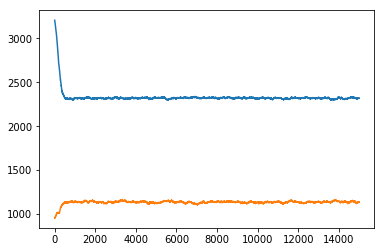

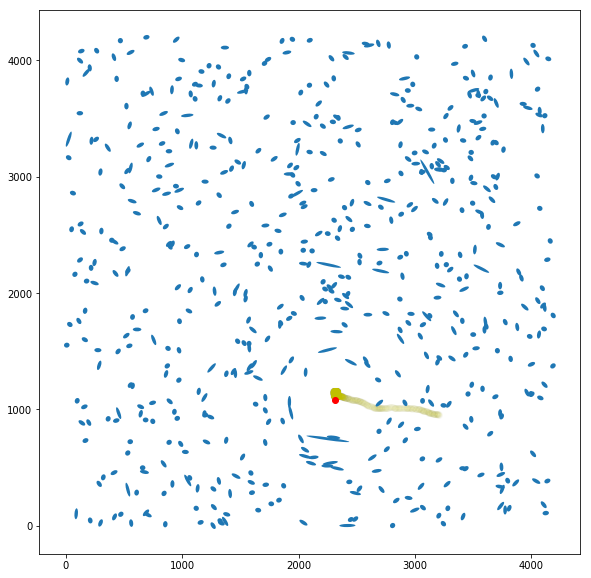

In [133]:
def draw_sky(galaxies):
    """adapted from Vishal Goklani"""
    size_multiplier = 45
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, aspect='equal')
    n = galaxies.shape[0]
    for i in range(n):
        _g = galaxies[i,:]
        x,y = _g[0], _g[1]
        d = np.sqrt( _g[2]**2 + _g[3]**2 )
        a = 1.0/ ( 1 - d )
        b = 1.0/( 1 + d)
        theta = np.degrees( np.arctan2( _g[3], _g[2])*0.5 )
        
        ax.add_patch( Ellipse(xy=(x, y), width=size_multiplier*a, height=size_multiplier*b, angle=theta) )
    ax.autoscale_view(tight=True)
    
    return fig

mean, stddev = sess.run([qXh.mean(), qXh.stddev()])
print(sess.run(qm.params))
print(mean, stddev)

samples = sess.run(qXh.params)

pred = samples[-2000:,0].mean(), samples[-2000:,1].mean()
print('prediction from stable sample: ', pred)
print('mean distantance to true halo:', np.sqrt(np.sum((halo[sky,2:4] - pred) ** 2)))


#plt.hist(samples, bins='auto')
#plt.show()

# Trace plot.
plt.plot(samples)
plt.show()
plt.clf()
fig = draw_sky(all_sky_star[sky][:,1:])
plt.scatter(samples[:,0], samples[:,1], alpha = 0.015, c = "y")
plt.scatter(halo[sky,2],halo[sky,3], c = "r")
plt.show()

# Criticism 2

10000/10000 [100%] ██████████████████████████████ Elapsed: 24s | Acceptance Rate: 1.000
[ 1389.14172363  1132.78894043] [ 365.77365112  379.37036133]
10000/10000 [100%] ██████████████████████████████ Elapsed: 23s | Acceptance Rate: 1.000
[ 2324.42089844  2122.41577148] [ 190.08918762   79.93008423]
10000/10000 [100%] ██████████████████████████████ Elapsed: 26s | Acceptance Rate: 1.000
[ 2583.73632812  2554.27050781] [ 238.19967651   61.91926193]
10000/10000 [100%] ██████████████████████████████ Elapsed: 21s | Acceptance Rate: 1.000
[  446.63668823  3190.67089844] [  4.72938299  12.28890228]
10000/10000 [100%] ██████████████████████████████ Elapsed: 23s | Acceptance Rate: 1.000
[ 2318.93798828  2099.44433594] [ 143.41340637  186.87150574]
10000/10000 [100%] ██████████████████████████████ Elapsed: 23s | Acceptance Rate: 1.000
[ 2396.44921875  2159.68261719] [ 97.43097687  78.55445099]
10000/10000 [100%] ██████████████████████████████ Elapsed: 23s | Acceptance Rate: 1.000
[ 2346.40771484 

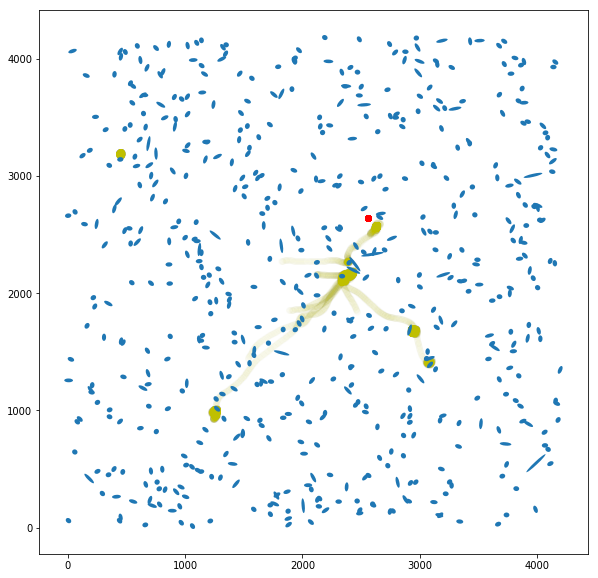

In [63]:
plt.clf()
fig = draw_sky(all_sky_star[sky][:,1:])
for i in np.arange(400,4001,1000):
    for j in np.arange(400,4001,1000):
        def constraints_normal(T):
            return tf.minimum(tf.maximum(tf.Variable(tf.random_normal([T, 2], mean=[i, j],stddev=1.)), 0), 4200)

        T = 10000
        qXh = Empirical(params=constraints_normal(T))
        #qsig = Empirical(params=tf.Variable(tf.zeros(10000)))
        inference = ed.SGHMC({Xh: qXh}, data={X: pos_xy, e1:X_e1, e2:X_e2})
        inference.run(step_size=5.)

        mean, stddev = sess.run([qXh.mean(), qXh.stddev()])
        print(mean, stddev)
        samples = sess.run(qXh.params)
        #plt.hist(samples, bins='auto')
        #plt.show()

        # Trace plot.
        # plt.plot(samples)
        # plt.show()


        plt.scatter(samples[200:,0], samples[200:,1], alpha = 0.015, c = "y")
        plt.scatter(halo[sky,2],halo[sky,3], c = "r")
plt.show()

# Example

In [25]:
import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.distributions as ds

from edward.models import Normal, Uniform, InverseGamma, Empirical

def tangential(glxy_position, halo_position, axis):
    delta = glxy_position - halo_position
    t = 2 * tf.atan2(delta[:,1], delta[:,0])
    return -tf.cos(t) if axis == 0 else -tf.sin(t)

# print(pos_all_xy.shape)
# print(pos_all_halo.shape)
# print(pos_all_e1_e2.shape)
N = pos_all_xy.shape[0]

# Model

X = tf.placeholder(tf.float32, [N, 2])
X_e1 = pos_all_e1_e2[:,:1].reshape(N).tolist()
X_e2 = pos_all_e1_e2[:,1:].reshape(N).tolist()

# Xh = Uniform(low=[0.,0.],high=[4200., 4200.])
Xh = tf.placeholder(tf.float32, [N, 2])
# Xh = [2315.61, 1082.86]
#m = Uniform(low=10.,high=1000.)
m= tf.constant(1.)

l2diff = tf.sqrt(tf.reduce_sum(tf.square(X - Xh), reduction_indices=1))/4200.

sess = ed.get_session()

w0 = Normal(loc=tf.zeros(1), scale=tf.ones(1))
b0 = Normal(loc=tf.zeros(1), scale=tf.ones(1))
w1 = Normal(loc=tf.zeros(1), scale=tf.ones(1))
b1 = Normal(loc=tf.zeros(1), scale=tf.ones(1))
w2 = Normal(loc=tf.zeros(1), scale=tf.ones(1))
b2 = Normal(loc=tf.zeros(1), scale=tf.ones(1))
b3 = Normal(loc=tf.zeros(1), scale=tf.ones(1))
y = Normal(loc=(l2diff**(-1)+b0)*w0+(l2diff**(1)+b1)*w1 + (l2diff**(2)+b2)*w2 + b3, scale=tf.ones(N))
mu = m / y

e1_var = tf.multiply(tangential(X, Xh, 0),mu)
e2_var = tf.multiply(tangential(X, Xh, 1),mu)

print(sess.run(e1_var,{X: pos_all_xy.tolist(), Xh : pos_all_halo.tolist()})[:10])
print(X_e1[:10])

[-0.8787027   0.87773722 -0.21192177 -0.2273882  -0.45488897  1.04863477
 -2.0123806  -0.14821216  2.84245038  0.80284011]
[-0.050569, -0.248973, 0.483764, -0.043463999999999996, -0.102021, -0.234802, -0.185349, -0.410029, -0.07373099999999999, 0.180122]


In [6]:
qw0 = Normal(loc=tf.Variable(tf.random_normal([1])),
            scale=tf.nn.softplus(tf.Variable(tf.random_normal([1]))))
qb0 = Normal(loc=tf.Variable(tf.random_normal([1])),
            scale=tf.nn.softplus(tf.Variable(tf.random_normal([1]))))
qw1 = Normal(loc=tf.Variable(tf.random_normal([1])),
            scale=tf.nn.softplus(tf.Variable(tf.random_normal([1]))))
qb1 = Normal(loc=tf.Variable(tf.random_normal([1])),
            scale=tf.nn.softplus(tf.Variable(tf.random_normal([1]))))
qw2 = Normal(loc=tf.Variable(tf.random_normal([1])),
            scale=tf.nn.softplus(tf.Variable(tf.random_normal([1]))))
qb2 = Normal(loc=tf.Variable(tf.random_normal([1])),
            scale=tf.nn.softplus(tf.Variable(tf.random_normal([1]))))
qb3 = Normal(loc=tf.Variable(tf.random_normal([1])),
            scale=tf.nn.softplus(tf.Variable(tf.random_normal([1]))))
             
inference = ed.KLqp({w0: qw0, b0: qb0, w1: qw1, b1: qb1, w2: qw2, b2: qb2, b3: qb3}, data={X: pos_all_xy.tolist(), e1_var:X_e1, e2_var:X_e2, Xh : pos_all_halo.tolist()})
inference.run(n_samples=5, n_iter=100)

100/100 [100%] ██████████████████████████████ Elapsed: 15s | Loss: 0.000


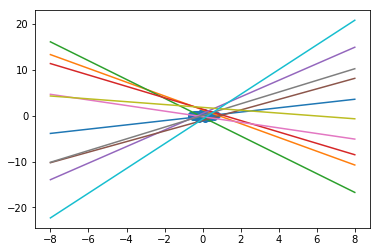

[ 23.10287476  -0.91216576  -0.23557788  -1.91401446  -0.47470939
  -0.80609763   1.56572306  -0.34153977  -0.31368241   0.55340815]


In [29]:
def visualise(X_data, y_data, w, b, n_samples=10):
    w_samples = w.sample(n_samples)[:, 0].eval()
    b_samples = b.sample(n_samples).eval()
    plt.scatter(X_data[:, 0], y_data)
    inputs = np.linspace(-8, 8, num=400)
    for ns in range(n_samples):
        output = inputs * w_samples[ns] + b_samples[ns]
        plt.plot(inputs, output)
    plt.show()
visualise(e1_e2[:,:1], e1_e2[:,1:], qw0, qb0)

e1_post = ed.copy(e1_var, {w0: qw0, b0: qb0, w1: qw1, b1: qb1, w2: qw2, b2: qb2, b3: qb3})
print(sess.run(e1_post,{X: pos_all_xy.tolist(), Xh : pos_all_halo.tolist()})[:10])

In [209]:
# w_samples = qw1.sample(100000)[:, 0].eval()
# plt.hist(w_samples,500)
# plt.show()
# w_samples = w1.sample(100000)[:, 0].eval()
# plt.hist(w_samples,500)
# plt.show()
#print(e1_var)
sess2.run(e1_var )

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_59' with dtype float and shape [160842,2]
	 [[Node: Placeholder_59 = Placeholder[dtype=DT_FLOAT, shape=[160842,2], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_59', defined at:
  File "/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-197-9228222d861a>", line 26, in <module>
    Xh = tf.placeholder(tf.float32, [N, 2])
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_59' with dtype float and shape [160842,2]
	 [[Node: Placeholder_59 = Placeholder[dtype=DT_FLOAT, shape=[160842,2], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
print("Mean squared error on test data:")
print(ed.evaluate('mean_squared_error', data={X: X_test, y_post: y_test}))

print("Mean absolute error on test data:")
print(ed.evaluate('mean_absolute_error', data={X: X_test, y_post: y_test}))

# Model II

In [4]:
e1_e2 = e1_e2.astype(np.float64, copy=False)
theta_0 = np.arctan2(e1_e2[:,1], e1_e2[:,0]) / 2.

In [115]:
import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.distributions as ds

from edward.models import Normal, Uniform, Empirical, Laplace, Dirichlet, Categorical, ParamMixture, PointMass

def calc_phi(glxy_position, halo_position):
    delta = glxy_position - halo_position
    t = tf.atan2(delta[:,1], delta[:,0])
    return t

N = num

# Model

X = tf.placeholder(tf.float32, [N, 2])

Xh = Uniform(low=[0.,0.],high=[4200., 4200.])
#Xh = [2300, 1000]
phi = calc_phi(X, Xh)

r = tf.sqrt(tf.reduce_sum(tf.square(X - Xh), reduction_indices=1))

sigma = tf.constant(0.00010816) * r + tf.constant(1.25309) #1.25309

z = ParamMixture(tf.ones([N,2]) * [0.5, 0.5], 
                         {'loc' : [tf.zeros(1) - np.pi/2., tf.zeros(1) + np.pi/2.],
                         'scale' : sigma},
                         Laplace)

print(z)
sess = ed.get_session()

l = (sess.run(z.sample(5000),{X: pos_xy, z:theta_0})[:,2])

RandomVariable("ParamMixture_229/", shape=(578,), dtype=float32)


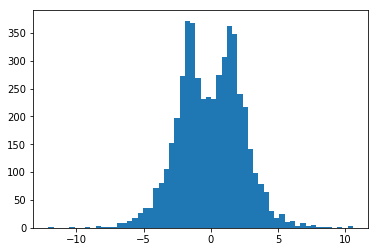

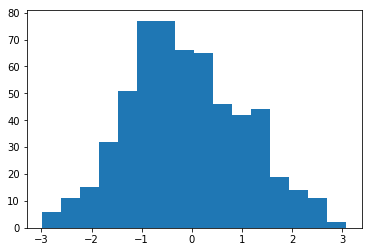

In [116]:
plt.hist(l,bins='auto')
plt.show()

plt.hist(theta_0-sess.run(phi, {X: pos_xy}),bins='auto')
plt.show()

# Inference II

In [121]:
# Inference
T = 15000
qXh = PointMass(params=tf.Variable(tf.random_uniform([2],[2100., 1100.],[2100.,1100.])))
inference = ed.MAP({Xh: qXh}, data={X: pos_xy, z:theta_0-phi})
inference.run(n_iter=5000)


5000/5000 [100%] ██████████████████████████████ Elapsed: 8s | Loss: 1538.581


# Criticism II

[ 2100.  1100.] [ 0.  0.]


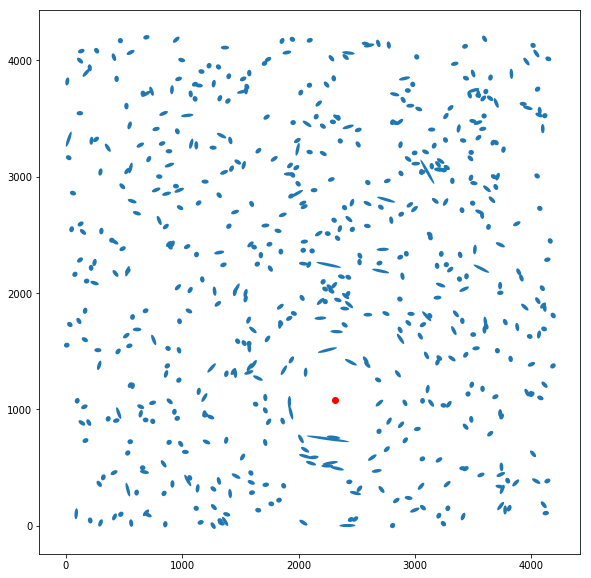

In [124]:
def draw_sky(galaxies):
    """adapted from Vishal Goklani"""
    size_multiplier = 45
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, aspect='equal')
    n = galaxies.shape[0]
    for i in range(n):
        _g = galaxies[i,:]
        x,y = _g[0], _g[1]
        d = np.sqrt( _g[2]**2 + _g[3]**2 )
        a = 1.0/ ( 1 - d )
        b = 1.0/( 1 + d)
        theta = np.degrees( np.arctan2( _g[3], _g[2])*0.5 )
        
        ax.add_patch( Ellipse(xy=(x, y), width=size_multiplier*a, height=size_multiplier*b, angle=theta) )
    ax.autoscale_view(tight=True)
    
    return fig

mean, stddev = sess.run([qXh.mean(), qXh.stddev()])
samples = sess.run(qXh.params)
print(mean, stddev)
fig = draw_sky(all_sky_star[sky][:,1:])
#plt.scatter(samples[:,0], samples[:,1], alpha = 0.015, c = "y")
#plt.scatter([mean[0]], [mean[1]], c = "y")

plt.scatter(halo[sky,2],halo[sky,3], c = "r")
plt.show()